In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [6]:
def quantimage(image, k):
    i = np.float32(image).reshape(-1,3)
    condition = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
    start_time = time.time()
    ret, label, center = cv2.kmeans(i, k, None, condition, 10, cv2.KMEANS_RANDOM_CENTERS)
    end_time = time.time()
    center = np.uint8(center)
    final_img = center[label.flatten()]
    final_img = final_img.reshape(image.shape)
    loss = np.sum((i - center[label.flatten()]) ** 2)
    return final_img, (end_time - start_time), loss/(10**10)

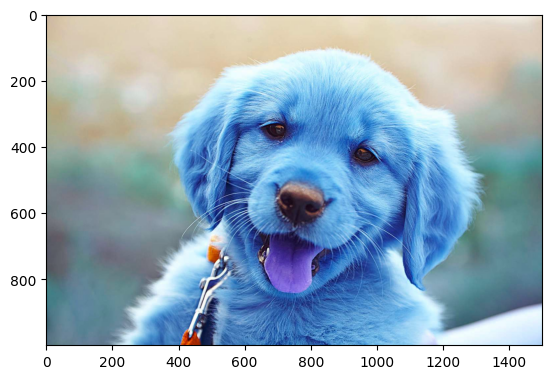

In [3]:
image = cv2.imread('image.jpg')
plt.imshow(image)
plt.show()

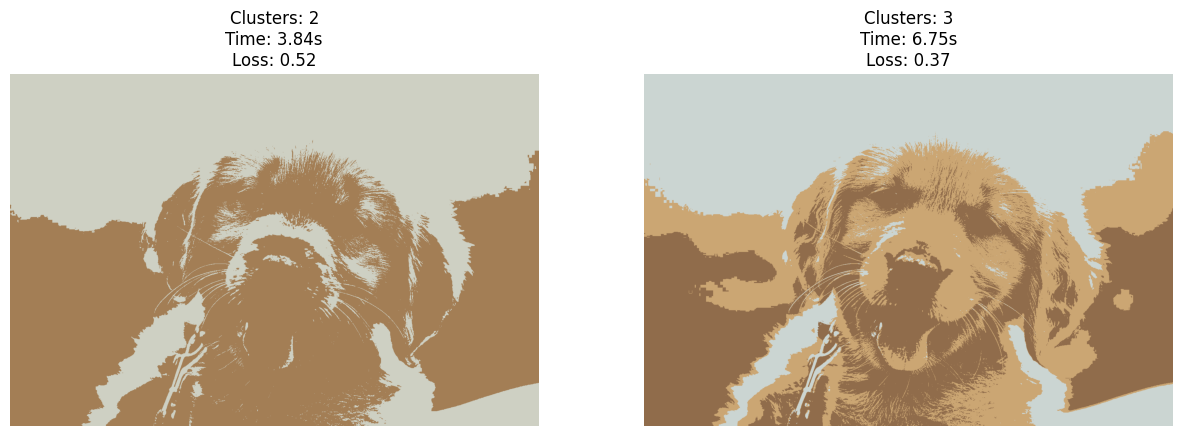

In [9]:
image = cv2.imread('image.jpg')

# Define number of clusters
num_clusters = [2, 3]

# Plot images for different numbers of clusters
fig, axs = plt.subplots(1, len(num_clusters), figsize=(15, 5))
for i, k in enumerate(num_clusters):
    quantized_img, time_taken, loss = quantimage(image, k)
    axs[i].imshow(cv2.cvtColor(quantized_img, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f'Clusters: {k}\nTime: {time_taken:.2f}s\nLoss: {loss:.2f}')
    axs[i].axis('off')

plt.show()